<img src="https://github.com/NOAA-OWP/gval/raw/main/docs/images/gval_light_mode.png" style="float:left">

# Catalog Comparisons

In [1]:
import pandas as pd
import rioxarray as rxr

from gval.catalogs.catalogs import catalog_compare

## Initializing Catalogs

The cataloging functionality was designed to easily facilitate batch comparisons of maps residing locally, in a service, or in the cloud.  The format of such catalogs are as follows:

In [89]:
TEST_DATA_DIR = './'

candidate_continuous_catalog = pd.read_csv(f'{TEST_DATA_DIR}candidate_catalog_0.csv')
benchmark_continuous_catalog = pd.read_csv(f'{TEST_DATA_DIR}benchmark_catalog_0.csv')
candidate_categorical_catalog = pd.read_csv(f'{TEST_DATA_DIR}candidate_catalog_1.csv')
benchmark_categorical_catalog = pd.read_csv(f'{TEST_DATA_DIR}benchmark_catalog_1.csv')

### Candidate Catalog

In [73]:
candidate_categorical_catalog

,map_id,compare_id,agreement_maps
0,./candidate_categorical_0.tif,compare1,agreement_categorical_0.tif
1,./candidate_categorical_1.tif,compare2,agreement_categorical_1.tif


The catalog should have columns representing: 
1. An identifier of a candidate map, (in this case `compare_id`) <br />
2. The location of the candidate map, (in this case `map_id`) <br />
3. The name of the agreement map to be created named `agreement_maps`

### Benchmark Catalog

In [74]:
benchmark_categorical_catalog

,map_id,compare_id
0,./benchmark_categorical_0.tif,compare1
1,./benchmark_categorical_1.tif,compare2


Similar to the previous catalog, the benchmark catalog should have columns representing: 
1. An identifier of a candidate map, (in this case `compare_id`) <br />
2. The location of the candidate map, (in this case `map_id`)

## Categorical Catalog Comparison

When `compare_type` is set to 'categorical' the catalog will be run as categorical comparisons.  See arguments and output below for the comparison metrics:

In [112]:
arguments = {
    "candidate_catalog": candidate_categorical_catalog,
    "benchmark_catalog": benchmark_categorical_catalog,
    "on": "compare_id",
    "map_ids": "map_id",
    "how": "inner",
    "compare_type": "categorical",
    "compare_kwargs": {
        "metrics": (
            "critical_success_index",
            "true_positive_rate",
            "positive_predictive_value",
        ),
        "encode_nodata": True,
        "nodata": -9999,
        "positive_categories": 2,
        "negative_categories": 1
    },
    "open_kwargs": {
        "mask_and_scale": True, 
        "masked": True
    }
}

agreement_categorical_catalog = catalog_compare(**arguments)
agreement_categorical_catalog.transpose()

,0,1,2
map_id_candidate,./candidate_categorical_0.tif,./candidate_categorical_1.tif,./candidate_categorical_1.tif
compare_id,compare1,compare2,compare2
agreement_maps,agreement_categorical_0.tif,agreement_categorical_1.tif,agreement_categorical_1.tif
map_id_benchmark,./benchmark_categorical_0.tif,./benchmark_categorical_1.tif,./benchmark_categorical_1.tif
band,1,1,2
fn,844.0,844.0,844.0
fp,844.0,844.0,844.0
tn,5939.0,5939.0,5939.0
tp,1977.0,1977.0,1977.0
critical_success_index,0.539427,0.539427,0.539427


We can see the agreement maps below (and why the metrics are similar as the datasets were essentially equivalent):

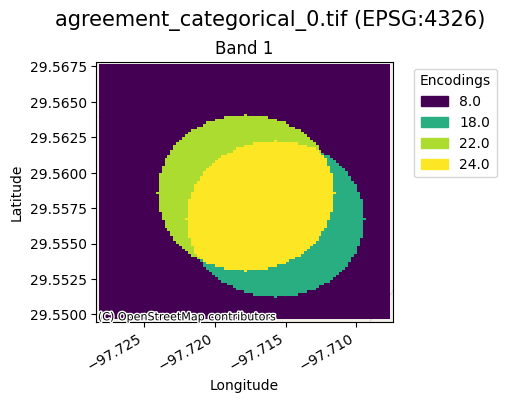

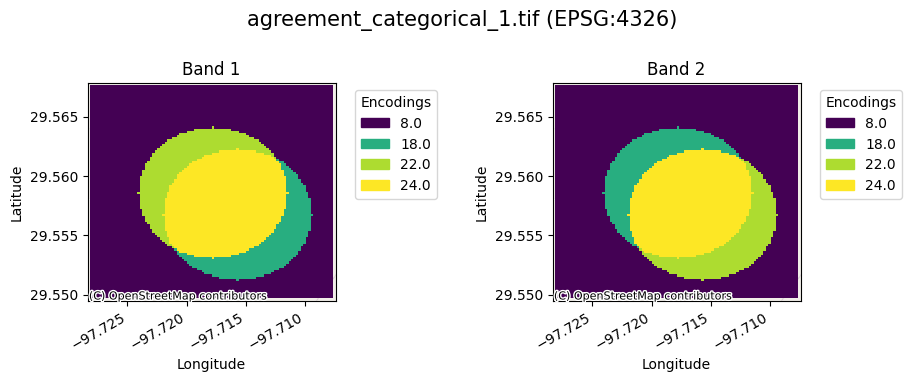

In [114]:
for ag_map in agreement_categorical_catalog['agreement_maps'].unique():
    rxr.open_rasterio(ag_map, mask_and_scale=True).gval.cat_plot(title=ag_map)

## Continuous Catalog Compare

The continuous catalogs are as follows:

In [90]:
candidate_continuous_catalog

,map_id,compare_id,agreement_maps
0,./candidate_continuous_0.tif,compare1,./agreement_continuous_0.tif
1,./candidate_continuous_1.tif,compare2,./agreement_continuous_1.tif


In [91]:
benchmark_continuous_catalog

,map_id,compare_id
0,./benchmark_continuous_0.tif,compare1
1,./benchmark_continuous_1.tif,compare2


Just like before, `compare_type` is set to 'continuous' and the catalog will be run as continuous comparisons:

In [101]:
arguments = {
    "candidate_catalog": candidate_continuous_catalog,
    "benchmark_catalog": benchmark_continuous_catalog,
    "on": "compare_id",
    "map_ids": "map_id",
    "how": "inner",
    "compare_type": "continuous",
    "compare_kwargs": {
        "metrics": (
            "coefficient_of_determination",
            "mean_absolute_error",
            "mean_absolute_percentage_error",
        ),
        "encode_nodata": True,
        "nodata": -9999,
    },
    "open_kwargs": {
        "mask_and_scale": True, 
        "masked": True
    }
}

agreement_continuous_catalog = catalog_compare(**arguments)
agreement_continuous_catalog.transpose()

,0,1
map_id_candidate,./candidate_continuous_0.tif,./candidate_continuous_1.tif
compare_id,compare1,compare2
agreement_maps,./agreement_continuous_0.tif,./agreement_continuous_1.tif
map_id_benchmark,./benchmark_continuous_0.tif,./benchmark_continuous_1.tif
band,1,1
coefficient_of_determination,-0.06616,-0.329965
mean_absolute_error,0.317389,0.485031
mean_absolute_percentage_error,0.159568,0.177735


We can see the continuous agreement maps below:

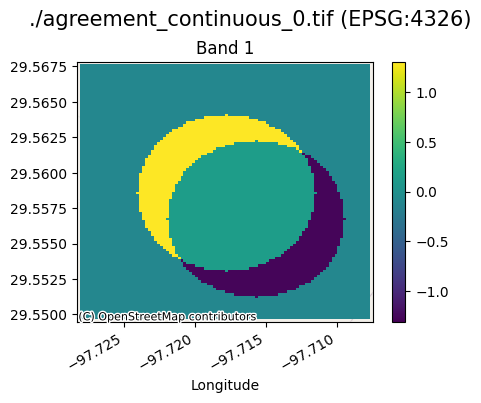

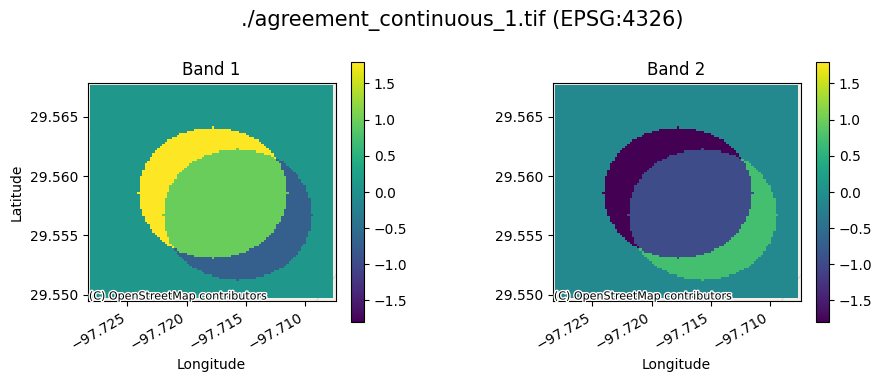

In [110]:
for ag_map in agreement_continuous_catalog['agreement_maps'].unique():
    rxr.open_rasterio(ag_map, mask_and_scale=True).gval.cont_plot(title=ag_map)